# Visualização de Dados e Informações - Prática #01

- Daniel Vieira Batista
- RA: 11106614

- Dependências:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly as ply
from matplotlib import pyplot as plt

- Leitura dos dados

In [6]:
df_vendas = pd.read_csv("VIS_Pr_01_Vendas.csv", sep=",", decimal=".", encoding="latin-1")

In [9]:
df_vendas.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [34]:
df_vendas.shape

(9994, 24)

In [10]:
df_vendas.head(3).T

,0,1,2
Row ID,1,2,3
Order ID,CA-2016-152156,CA-2016-152156,CA-2016-138688
Order Date,11/8/2016,11/8/2016,6/12/2016
Ship Date,11/11/2016,11/11/2016,6/16/2016
Ship Mode,Second Class,Second Class,Second Class
Customer ID,CG-12520,CG-12520,DV-13045
Customer Name,Claire Gute,Claire Gute,Darrin Van Huff
Segment,Consumer,Consumer,Corporate
Country,United States,United States,United States
City,Henderson,Henderson,Los Angeles


In [13]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

------------------

### Q1

Q1. (2,0) Segundo seu chefe, o pessoal de Vendas adora Excel. Assim, eles gostariam de receber um CSV para
contrastar Sales X Profit segmentado por Region, destacando qual a media de Discount aplicado.

- Quais são as regiões possíveis e suas volumetrias?

In [16]:
df_vendas.Region.value_counts(dropna=False, normalize=False)

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

- Criando a função que fará a agregação:

In [45]:
def agg_func(g):
    
    dictResult = {}
    
    dictResult['sales_total'] = g["Sales"].sum()
    dictResult['quantity_total'] = g["Quantity"].sum()
    dictResult['discount_mean'] = g["Discount"].mean()
    dictResult['discount_median'] = g["Discount"].median()
    dictResult['discount_std'] = g["Discount"].std()
    dictResult['discount_max'] = g["Discount"].max()
    dictResult['discount_min'] = g["Discount"].min()
    
    return pd.Series(dictResult)

In [46]:
%%time
df_agg = df_vendas.groupby(by=["Region"], as_index=False, axis=0, dropna=False, observed=False, sort=True).apply(agg_func)

Wall time: 8 ms


- <b>Resposta:</b>

In [47]:
df_agg

,Region,sales_total,quantity_total,discount_mean,discount_median,discount_std,discount_max,discount_min
0,Central,501239.8908,8780.0,0.240353,0.2,0.265433,0.8,0.0
1,East,678781.2400,10618.0,0.145365,0.0,0.193155,0.7,0.0
2,South,391721.9050,6209.0,0.147253,0.2,0.197420,0.7,0.0
3,West,725457.8245,12266.0,0.109335,0.0,0.146861,0.7,0.0


In [88]:
# O resultado com os dados ficará disponível com o nome "dados_vendas.csv"
df_agg.to_csv("dados_vendas.csv", sep=";", decimal=".")

------------------

### Q2

Q2. (4,0) Ja para o pessoal de marketing de produto, seu chefe indicou que eles gostariam de uma visão de Profit acumulado por ano (Order Date) para cada um das sub-categorias de produto (Sub-Category). Marketing adora um gráfico de barras! Voce pode usar a bilioteca matplotlib ou seaborn.

- Quantos anos distintos temos?

In [48]:
# Vamos converter para data para ficar mais fácil de trabalhar
df_vendas['Order Date'] = pd.to_datetime(df_vendas['Order Date'], format="%m/%d/%Y", errors="coerce")

In [49]:
# Criando as variáveis de dia, mês e ano
df_vendas['day'] = df_vendas['Order Date'].apply(lambda e: e.day)
df_vendas['month'] = df_vendas['Order Date'].apply(lambda e: e.month)
df_vendas['year'] = df_vendas['Order Date'].apply(lambda e: e.year)

In [50]:
df_vendas['year'].value_counts()

2017    3312
2016    2587
2015    2102
2014    1993
Name: year, dtype: int64

- Os dados de profit fazem sentido:

In [80]:
df_vendas.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

- Quantas subcategorias temos?
    - Temos mais categorias do que anos distintos, isso influencia no nosso plot;

In [51]:
df_vendas['Sub-Category'].value_counts(dropna=False, normalize=False)

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

- Gerando função de agregação:

In [64]:
def agg_func_2(g):
    
    dictResult = {}
    
    g = g.sort_values(by=['year'], ascending=True)
    dictResult['year'] = int(g["year"].iat[0])
    
    dictResult['profit_sum'] = g["Profit"].sum()
    
    return pd.Series(dictResult)

In [65]:
%%time
df_agg2 = df_vendas.groupby(by=["Sub-Category", "year"], as_index=False, axis=0,
                            dropna=False, observed=False, sort=True, group_keys=False).apply(agg_func_2)

df_agg2.year = df_agg2.year.astype(int)

df_agg2.head()

Wall time: 53 ms


,Sub-Category,year,profit_sum
0,Accessories,2014,6402.7150
1,Accessories,2015,10197.2752
2,Accessories,2016,9664.2885
3,Accessories,2017,15672.3570
4,Appliances,2014,2459.4999


In [72]:
def agg_func_3(g):
    
    dictResult = {}
    
    dictResult['sub_category'] = g["Sub-Category"]
    dictResult['year'] = g["year"]
    dictResult['profit_sum'] = g["profit_sum"]
    dictResult['profit_cumsum'] = g["profit_sum"].cumsum()
    
    return pd.DataFrame(dictResult)

df_agg3 = df_agg2.groupby(by=["Sub-Category"], as_index=False, axis=0,
                            dropna=False, observed=False, sort=True).apply(agg_func_3)

In [74]:
df_agg3.head(5)

,sub_category,year,profit_sum,profit_cumsum
0,Accessories,2014,6402.7150,6402.7150
1,Accessories,2015,10197.2752,16599.9902
2,Accessories,2016,9664.2885,26264.2787
3,Accessories,2017,15672.3570,41936.6357
4,Appliances,2014,2459.4999,2459.4999


- Plot resposta:

C:\Users\vierb\anaconda3\lib\site-packages\seaborn\categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


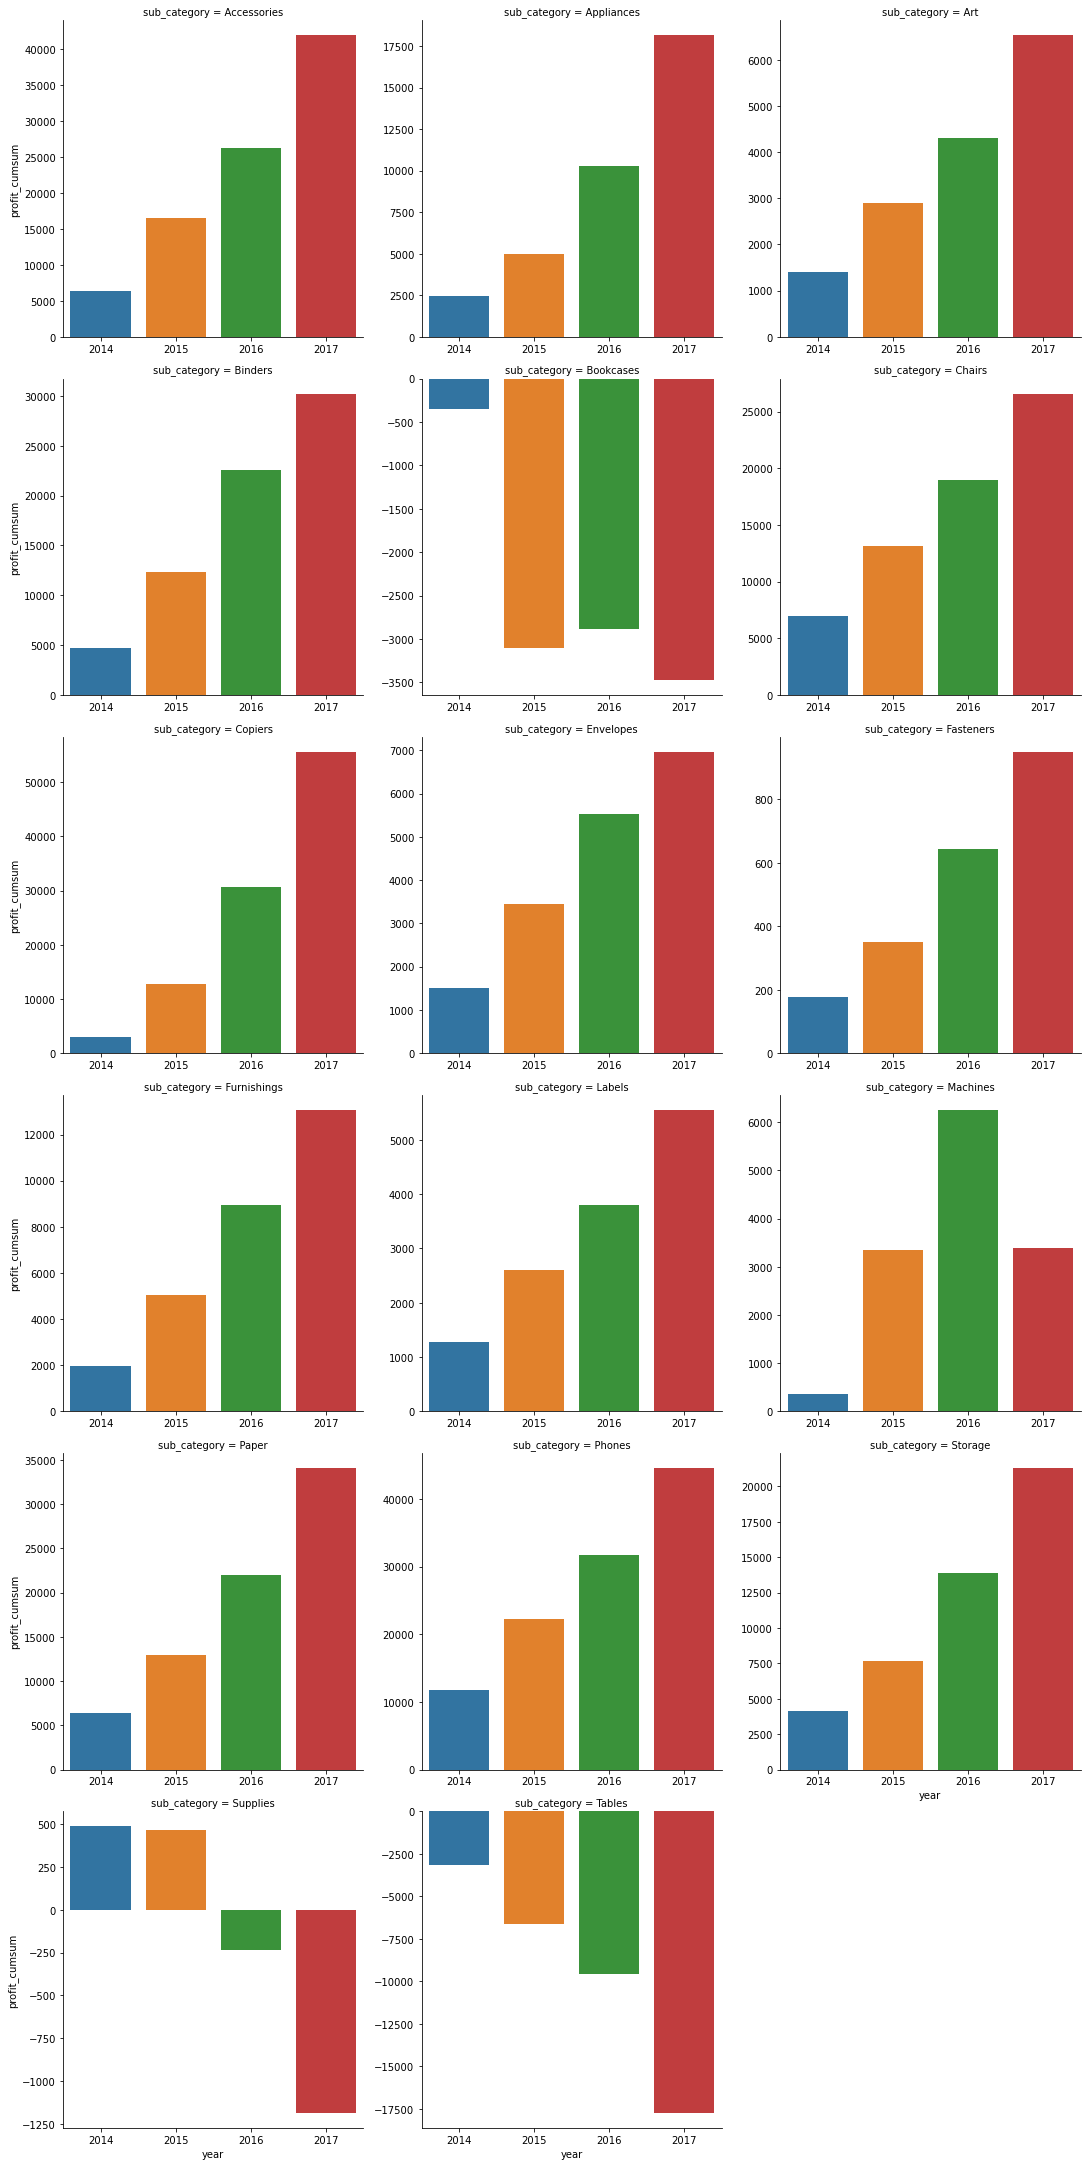

In [87]:
sb.catplot(data=df_agg3, 
           col="sub_category", 
           x="year", 
           y="profit_cumsum", 
           height=5, 
           kind="bar",
           orient="v",
           legend=True,
           sharey=False,
           sharex=False,
           margin_titles=True,
           col_wrap=3)

In [89]:
# O resultado com os dados ficará disponível com o nome "dados_vendas.csv"
df_agg3.to_csv("dados_marketing.csv", sep=";", decimal=".")

------------------

### Q3

Q3. (4,0) Por fim, o pessoal do financeiro gostariam de receber um CSV com a quantidade de consumidores por
classe de performance das vendas e Segment do consumidor.

In [90]:
df_vendas.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,day,month,year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,11,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,11,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,12,6,2016


In [91]:
df_vendas.head(3).T

,0,1,2
Row ID,1,2,3
Order ID,CA-2016-152156,CA-2016-152156,CA-2016-138688
Order Date,2016-11-08 00:00:00,2016-11-08 00:00:00,2016-06-12 00:00:00
Ship Date,11/11/2016,11/11/2016,6/16/2016
Ship Mode,Second Class,Second Class,Second Class
Customer ID,CG-12520,CG-12520,DV-13045
Customer Name,Claire Gute,Claire Gute,Darrin Van Huff
Segment,Consumer,Consumer,Corporate
Country,United States,United States,United States
City,Henderson,Henderson,Los Angeles


- Temos muitos consumidores que fizeram mais de um consumo:

In [92]:
df_vendas["Customer ID"].value_counts()

WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: Customer ID, Length: 793, dtype: int64

- Tipos de segmento e suas volumetrias:

In [102]:
df_vendas["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

- Classe de Performance:

In [93]:
def class_perf(row):
    r = row["Profit"]/(row["Sales"]-row["Discount"])
    return r

In [96]:
df_vendas["class_perf"] = df_vendas.apply(class_perf, axis=1)

In [97]:
df_vendas["class_perf"].describe()

count    9994.000000
mean        0.096314
std         0.715747
min       -37.155556
25%         0.075018
50%         0.270000
75%         0.366666
max         3.873770
Name: class_perf, dtype: float64

In [98]:
df_vendas[["Profit","Sales","Discount","class_perf"]].head()

,Profit,Sales,Discount,class_perf
0,41.9136,261.9600,0.00,0.160000
1,219.5820,731.9400,0.00,0.300000
2,6.8714,14.6200,0.00,0.470000
3,-383.0310,957.5775,0.45,-0.400188
4,2.5164,22.3680,0.20,0.113515


In [101]:
def class_perf_label(v):
    
    if v <= 0.1:
        return "E"
    elif v <= 0.15:
        return "D"
    elif v <= 0.2:
        return "C"
    elif v <= 0.25:
        return "B"
    elif v > 0.25:
        return "A"
    else:
        return "F"
    
df_vendas["class_perf_label"] = df_vendas.class_perf.apply(class_perf_label)

- Pivotando com agregação:

In [104]:
df_result = df_vendas.pivot_table(values="Customer ID",index=["class_perf_label"], columns=["Segment"], aggfunc="count")

In [112]:
df_result

Segment,Consumer,Corporate,Home Office
class_perf_label,,,
A,2821,1675,1020
B,212,124,95
C,186,114,66
D,393,213,114
E,1579,894,488


In [115]:
df_result.sum()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
dtype: int64

In [114]:
df_result.sum().sum()

9994

In [117]:
df_vendas.shape

(9994, 26)

- Resultado:

In [119]:
# O resultado com os dados ficará disponível com o nome "dados_vendas.csv"
df_result.to_csv("dados_financeiro.csv", sep=";", decimal=".")